In [1]:
import requests
import json
import pandas as pd
import re
import math
import warnings
warnings.filterwarnings('ignore')
import csv
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from scipy.stats import norm, skew
from sklearn.linear_model import LogisticRegression
pd.set_option('display.max_columns', 50) # show all columns
pd.set_option('display.max_rows', 500) # show all rows
from matplotlib.colors import LogNorm

In [5]:
df = pd.read_csv('../data/final_data.csv')

## Data Analysis
Based on 44 countries


In [13]:
countries = df['LOCATION'].unique() 
len(countries)

44

### Happiness
Lower rank means more happiness!

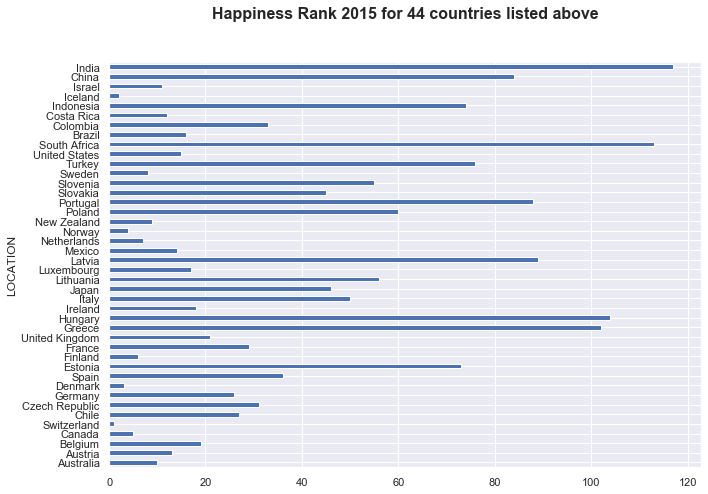

In [43]:
fig, ax = plt.subplots(figsize=(10,7))

countries = df['LOCATION'].unique() 
sub_df = df[df.LOCATION.isin(countries)].drop('Region',axis=1).set_index('LOCATION')
sub_df = sub_df[sub_df.TIME ==2015]

sub_df['Happiness Rank'].plot(kind='barh')
ax.text(x=0.5, y=1.1, s='Happiness Rank 2015 for 44 countries listed above', fontsize=16, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
fig.tight_layout()
plt.show()

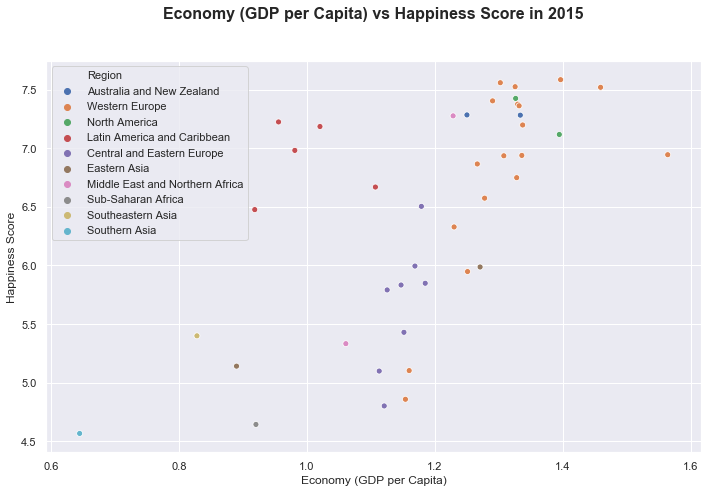

In [60]:
fig, ax = plt.subplots(figsize=(10,7))

sns.scatterplot("Economy (GDP per Capita)","Happiness Score",hue='Region', data=df[df['TIME'] == 2015])
ax.text(x=0.5, y=1.1, s='Economy (GDP per Capita) vs Happiness Score in 2015', fontsize=16, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
#plt.ylim(0, 8)
#plt.xlim(0, 1.8)

fig.tight_layout()
plt.show()

Positive (linear) relationship between GDP and happiness score

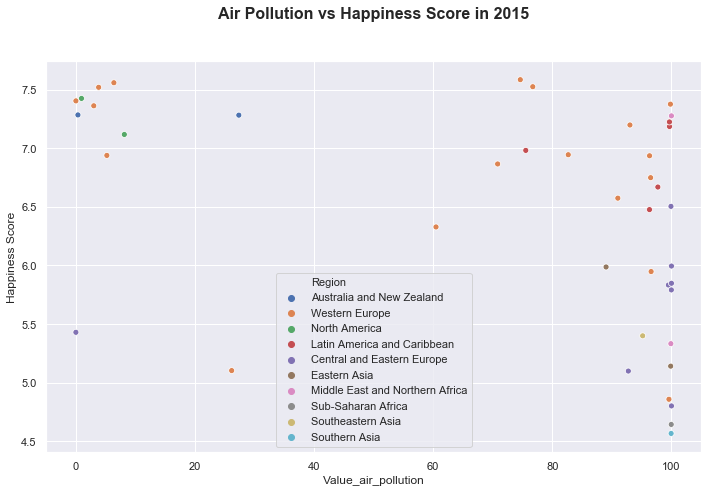

In [58]:
fig, ax = plt.subplots(figsize=(10,7))

sns.scatterplot("Value_air_pollution","Happiness Score",hue='Region', data=df[df['TIME'] == 2015])
ax.text(x=0.5, y=1.1, s='Air Pollution vs Happiness Score in 2015', fontsize=16, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
#plt.ylim(0, 10)
#plt.xlim(0, 110)

fig.tight_layout()
plt.show()


We can see that, the countries with lower air pollution are more likely to have higher happiness score

### Summary Statistics
- Overall
- By Region
- By Time and Region

In [52]:
#Country with lowest and highest happiness scores for each year 
idx1 = df[df["TIME"] == 2015]["Happiness Score"].idxmin()
print(df.loc[idx1][["LOCATION", "Happiness Score"]])

idx2 = df[df["TIME"] == 2016]["Happiness Score"].idxmin()
print(df.loc[idx2][["LOCATION", "Happiness Score"]])

idx3 = df[df["TIME"] == 2017]["Happiness Score"].idxmin()
print(df.loc[idx3][["LOCATION", "Happiness Score"]])

idx1 = df[df["TIME"] == 2015]["Happiness Score"].idxmax()
print(df.loc[idx1][["LOCATION", "Happiness Score"]])

idx2 = df[df["TIME"] == 2016]["Happiness Score"].idxmax()
print(df.loc[idx2][["LOCATION", "Happiness Score"]])

idx3 = df[df["TIME"] == 2017]["Happiness Score"].idxmax()
print(df.loc[idx3][["LOCATION", "Happiness Score"]])

LOCATION           India
Happiness Score    4.565
Name: 124, dtype: object
LOCATION           India
Happiness Score    4.404
Name: 125, dtype: object
LOCATION           South Africa
Happiness Score           4.829
Name: 96, dtype: object
LOCATION           Switzerland
Happiness Score          7.587
Name: 12, dtype: object
LOCATION           Denmark
Happiness Score      7.526
Name: 24, dtype: object
LOCATION           Norway
Happiness Score     7.537
Name: 73, dtype: object


In [69]:
for column in df.columns:
    print(column)
    print(df[column].describe())
    print('------------------------')

LOCATION
count        126
unique        44
top       Latvia
freq           3
Name: LOCATION, dtype: object
------------------------
TIME
count     126.000000
mean     2015.992063
std         0.814823
min      2015.000000
25%      2015.000000
50%      2016.000000
75%      2017.000000
max      2017.000000
Name: TIME, dtype: float64
------------------------
Value_disposable_income
count      126.000000
mean     26790.265885
std       8531.395268
min       9090.913293
25%      19300.931047
50%      26408.843693
75%      32293.550618
max      50203.258403
Name: Value_disposable_income, dtype: float64
------------------------
Value_adult_education
count    126.000000
mean      33.027393
std       11.438286
min        6.979802
25%       23.258045
50%       34.442646
75%       42.272240
max       56.714520
Name: Value_adult_education, dtype: float64
------------------------
Value_alcohol_consumption
count    126.000000
mean       8.186070
std        3.051071
min        0.300000
25%        6.73

In [53]:
for region in df["Region"].unique():
    sub_data = df[df['Region']==region]
    print(region)
    print()
    for column in df.columns:
        print(column)
        print()
        print(sub_data[column].describe())
        print('------------------------')
    print()
    print()

Australia and New Zealand

LOCATION

count               6
unique              2
top       New Zealand
freq                3
Name: LOCATION, dtype: object
------------------------
TIME

count       6.000000
mean     2016.000000
std         0.894427
min      2015.000000
25%      2015.250000
50%      2016.000000
75%      2016.750000
max      2017.000000
Name: TIME, dtype: float64
------------------------
Value_disposable_income

count        6.000000
mean     32263.028270
std       7168.323201
min      25750.109794
25%      25750.109794
50%      31745.142436
75%      38429.179818
max      39928.817097
Name: Value_disposable_income, dtype: float64
------------------------
Value_adult_education

count     6.000000
mean     40.005739
std       4.595336
min      34.040531
25%      36.638962
50%      40.309594
75%      43.530114
max      45.355675
Name: Value_adult_education, dtype: float64
------------------------
Value_alcohol_consumption

count    6.000000
mean     9.175000
std      0.4263

count    6.000000
mean     5.816667
std      1.098029
min      4.400000
25%      5.000000
50%      5.850000
75%      6.775000
max      7.000000
Name: unemployment, dtype: float64
------------------------
HDI_value

count    6.000000
mean     0.922333
std      0.002338
min      0.920000
25%      0.920500
50%      0.922000
75%      0.923500
max      0.926000
Name: HDI_value, dtype: float64
------------------------
Region

count                 6
unique                1
top       North America
freq                  6
Name: Region, dtype: object
------------------------
Happiness Score

count    6.000000
mean     7.227167
std      0.179331
min      6.993000
25%      7.107750
50%      7.217500
75%      7.382000
max      7.427000
Name: Happiness Score, dtype: float64
------------------------
Economy (GDP per Capita)

count    6.000000
mean     1.449062
std      0.079941
min      1.326290
25%      1.405920
50%      1.459677
75%      1.500771
max      1.546259
Name: Economy (GDP per Capita), d

count    5.000000
mean     6.600000
std      0.821584
min      5.700000
25%      5.700000
50%      7.200000
75%      7.200000
max      7.200000
Name: Value_alcohol_consumption, dtype: float64
------------------------
Value_air_pollution

count     5.000000
mean     89.746750
std       9.956486
min      79.353220
25%      80.627670
50%      89.020030
75%      99.865540
max      99.867290
Name: Value_air_pollution, dtype: float64
------------------------
Value_overweight_population

count     4.000000
mean     29.441667
std       2.879606
min      26.766667
25%      27.066667
50%      29.350000
75%      31.725000
max      32.300000
Name: Value_overweight_population, dtype: float64
------------------------
Value_avg_annual_hours

count       5.000000
mean     1714.000000
std         3.535534
min      1709.000000
25%      1714.000000
50%      1714.000000
75%      1714.000000
max      1719.000000
Name: Value_avg_annual_hours, dtype: float64
------------------------
Happiness Rank

count    

Southeastern Asia

LOCATION

count             3
unique            1
top       Indonesia
freq              3
Name: LOCATION, dtype: object
------------------------
TIME

count       3.0
mean     2016.0
std         1.0
min      2015.0
25%      2015.5
50%      2016.0
75%      2016.5
max      2017.0
Name: TIME, dtype: float64
------------------------
Value_disposable_income

count        3.000000
mean     26790.265885
std          0.000000
min      26790.265885
25%      26790.265885
50%      26790.265885
75%      26790.265885
max      26790.265885
Name: Value_disposable_income, dtype: float64
------------------------
Value_adult_education

count     3.000000
mean     11.254249
std       0.649052
min      10.567527
25%      10.952589
50%      11.337651
75%      11.597610
max      11.857569
Name: Value_adult_education, dtype: float64
------------------------
Value_alcohol_consumption

count    3.0
mean     0.3
std      0.0
min      0.3
25%      0.3
50%      0.3
75%      0.3
max      0.3
Nam

In [34]:
#by region and time:
interested_columns = ["Happiness Score", "HDI_value", "unemployment", "income_inequality",
                   "Value_disposable_income", "Value_adult_education"]
for time in df["TIME"].unique():
    for region in df["Region"].unique():
        sub_data = df[(df['Region']==region) & (df["TIME"]==time)]
        print(str(time) + " | " + region)
        print()
        for column in interested_columns:
            print(column)
            print()
            print(sub_data[column].describe())
            print('------------------------')
        print()
        print()

2015 | Australia and New Zealand

Happiness Score

count    2.000000
mean     7.285000
std      0.001414
min      7.284000
25%      7.284500
50%      7.285000
75%      7.285500
max      7.286000
Name: Happiness Score, dtype: float64
------------------------
HDI_value

count    2.000000
mean     0.925000
std      0.015556
min      0.914000
25%      0.919500
50%      0.925000
75%      0.930500
max      0.936000
Name: HDI_value, dtype: float64
------------------------
unemployment

count    2.000000
mean     5.750000
std      0.494975
min      5.400000
25%      5.575000
50%      5.750000
75%      5.925000
max      6.100000
Name: unemployment, dtype: float64
------------------------
income_inequality

count    2.000000
mean     7.950000
std      0.070711
min      7.900000
25%      7.925000
50%      7.950000
75%      7.975000
max      8.000000
Name: income_inequality, dtype: float64
------------------------
Value_disposable_income

count        2.000000
mean     31745.142436
std       8478.

count       1.000000
mean     9090.913293
std              NaN
min      9090.913293
25%      9090.913293
50%      9090.913293
75%      9090.913293
max      9090.913293
Name: Value_disposable_income, dtype: float64
------------------------
Value_adult_education

count    1.000000
mean     6.988939
std           NaN
min      6.988939
25%      6.988939
50%      6.988939
75%      6.988939
max      6.988939
Name: Value_adult_education, dtype: float64
------------------------


2015 | Southeastern Asia

Happiness Score

count    1.000
mean     5.399
std        NaN
min      5.399
25%      5.399
50%      5.399
75%      5.399
max      5.399
Name: Happiness Score, dtype: float64
------------------------
HDI_value

count    1.000
mean     0.686
std        NaN
min      0.686
25%      0.686
50%      0.686
75%      0.686
max      0.686
Name: HDI_value, dtype: float64
------------------------
unemployment

count    1.0
mean     4.5
std      NaN
min      4.5
25%      4.5
50%      4.5
75%      4.5
max 

count    3.000000
mean     0.847667
std      0.057761
min      0.787000
25%      0.820500
50%      0.854000
75%      0.878000
max      0.902000
Name: HDI_value, dtype: float64
------------------------
unemployment

count     3.000000
mean      7.166667
std       3.194266
min       4.800000
25%       5.350000
50%       5.900000
75%       8.350000
max      10.800000
Name: unemployment, dtype: float64
------------------------
income_inequality

count     3.000000
mean     13.972222
std       1.250592
min      12.700000
25%      13.358333
50%      14.016667
75%      14.608333
max      15.200000
Name: income_inequality, dtype: float64
------------------------
Value_disposable_income

count        3.000000
mean     19284.356173
std          0.000000
min      19284.356173
25%      19284.356173
50%      19284.356173
75%      19284.356173
max      19284.356173
Name: Value_disposable_income, dtype: float64
------------------------
Value_adult_education

count     3.000000
mean     30.960599
std 

count    1.00
mean     5.92
std       NaN
min      5.92
25%      5.92
50%      5.92
75%      5.92
max      5.92
Name: Happiness Score, dtype: float64
------------------------
HDI_value

count    1.000
mean     0.909
std        NaN
min      0.909
25%      0.909
50%      0.909
75%      0.909
max      0.909
Name: HDI_value, dtype: float64
------------------------
unemployment

count    1.0
mean     2.8
std      NaN
min      2.8
25%      2.8
50%      2.8
75%      2.8
max      2.8
Name: unemployment, dtype: float64
------------------------
income_inequality

count    1.0
mean     3.6
std      NaN
min      3.6
25%      3.6
50%      3.6
75%      3.6
max      3.6
Name: income_inequality, dtype: float64
------------------------
Value_disposable_income

count        1.000000
mean     31002.675624
std               NaN
min      31002.675624
25%      31002.675624
50%      31002.675624
75%      31002.675624
max      31002.675624
Name: Value_disposable_income, dtype: float64
------------------------


### Suicide

In [24]:
suicide_statistics = pd.read_csv('../data/mental_health/who_suicide_statistics.csv')
suicide_statistics.head()

,country,year,sex,age,suicides_no,population
0,Albania,1985,female,15-24 years,NaN,277900.0
1,Albania,1985,female,25-34 years,NaN,246800.0
2,Albania,1985,female,35-54 years,NaN,267500.0
3,Albania,1985,female,5-14 years,NaN,298300.0
4,Albania,1985,female,55-74 years,NaN,138700.0


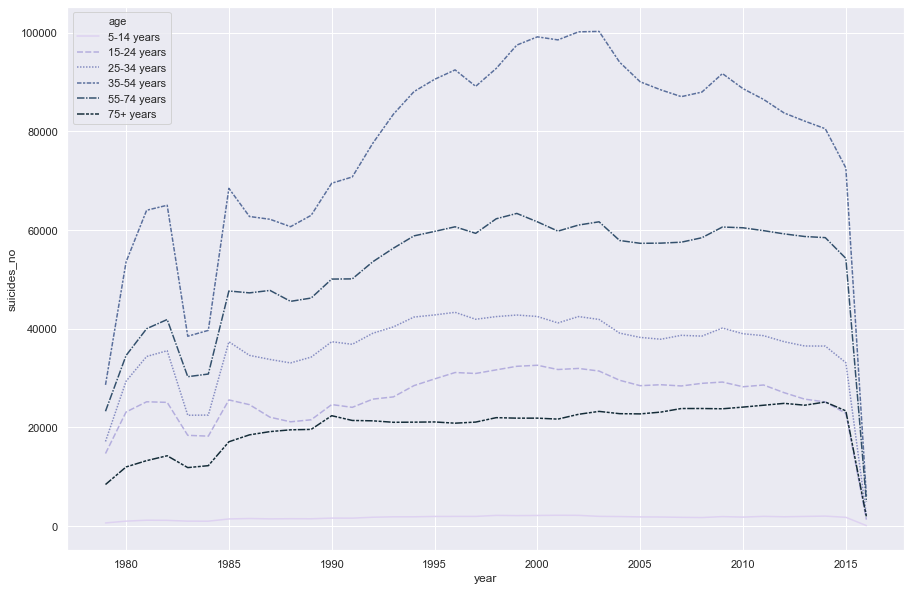

In [25]:
from matplotlib.colors import LogNorm
df = suicide_statistics.groupby(['year','age']).suicides_no.sum().reset_index()
df['age'] = df.age.astype(pd.api.types.CategoricalDtype(categories = ['5-14 years','15-24 years','25-34 years','35-54 years','55-74 years','75+ years']))
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot('year','suicides_no',hue='age',style='age',data=df,hue_norm=LogNorm(),palette="ch:2.5,.25",sort=False)